<a href="https://colab.research.google.com/github/maiduyanh1705/IBM_Data-Science_Project/blob/master/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
!pip install folium

In [2]:
!pip install geopy

In [3]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import folium
import json
import requests
import codecs

try:
  import geocoder
except:
  !pip install geocoder
  import geocoder

from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from pandas.core.common import flatten

print("Libraries imported.")

     |████████████████████████████████| 102kB 2.7MB/s 
Libraries imported.


# Data

In [4]:
!wget https://en.wikipedia.org/wiki/Category:Arrondissements_of_Paris

--2020-03-10 06:23:53--  https://en.wikipedia.org/wiki/Category:Arrondissements_of_Paris
Resolving en.wikipedia.org (en.wikipedia.org)... 103.102.166.224, 2001:df2:e500:ed1a::1
Connecting to en.wikipedia.org (en.wikipedia.org)|103.102.166.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Category:Arrondissements_of_Paris’

Category:Arrondisse     [ <=>                ]  47.48K  --.-KB/s    in 0.08s   

2020-03-10 06:23:54 (561 KB/s) - ‘Category:Arrondissements_of_Paris’ saved [48615]



In [0]:
html = codecs.open('Category:Arrondissements_of_Paris', encoding='utf-8').read()
soup = BeautifulSoup(html, 'html.parser')

In [0]:
def clean_district_name(district_name):
  if '►  ' in district_name:
    district_name = district_name.replace('►  ', '')
#  if 'District' not in district_name:
#    district_name += ' District'
  return district_name

In [7]:
districts = [li.text.split('\n') for li in soup.find_all('ul')[1:2]]
districts = list(flatten(districts))
districts = [clean_district_name(dist) for dist in districts]

print('There are {} districts in Paris.'.format(len(districts)))
districts

There are 20 districts in Paris.


['1st arrondissement of Paris\u200e (6 C, 7 P)',
 '2nd arrondissement of Paris\u200e (2 C, 6 P)',
 '3rd arrondissement of Paris\u200e (3 C, 5 P)',
 '4th arrondissement of Paris\u200e (3 C, 15 P)',
 '5th arrondissement of Paris\u200e (3 C, 16 P)',
 '6th arrondissement of Paris\u200e (4 C, 22 P)',
 '7th arrondissement of Paris\u200e (3 C, 13 P)',
 '8th arrondissement of Paris\u200e (4 C, 21 P)',
 '9th arrondissement of Paris\u200e (2 C, 16 P)',
 '10th arrondissement of Paris\u200e (3 C, 11 P)',
 '11th arrondissement of Paris\u200e (4 C, 19 P)',
 '12th arrondissement of Paris\u200e (2 C, 14 P)',
 '13th arrondissement of Paris\u200e (2 C, 24 P)',
 '14th arrondissement of Paris\u200e (2 C, 12 P)',
 '15th arrondissement of Paris\u200e (2 C, 15 P)',
 '16th arrondissement of Paris\u200e (4 C, 29 P)',
 '17th arrondissement of Paris\u200e (2 C, 12 P)',
 '18th arrondissement of Paris\u200e (3 C, 15 P)',
 '19th arrondissement of Paris\u200e (3 C, 13 P)',
 '20th arrondissement of Paris\u200e (2 C, 

In [0]:
district = [d[0:19] for d in districts]

In [9]:
district

['1st arrondissement ',
 '2nd arrondissement ',
 '3rd arrondissement ',
 '4th arrondissement ',
 '5th arrondissement ',
 '6th arrondissement ',
 '7th arrondissement ',
 '8th arrondissement ',
 '9th arrondissement ',
 '10th arrondissement',
 '11th arrondissement',
 '12th arrondissement',
 '13th arrondissement',
 '14th arrondissement',
 '15th arrondissement',
 '16th arrondissement',
 '17th arrondissement',
 '18th arrondissement',
 '19th arrondissement',
 '20th arrondissement']

In [0]:
geolocator = Nominatim(user_agent='ibm-capstone')

In [0]:
districts_lat = []
districts_lng = []


In [12]:
for dist in district:
    location = geolocator.geocode(dist, timeout=10000)
    districts_lat.append(location.latitude)
    districts_lng.append(location.longitude)

print('{} latitudes and {} longitudes were found.'.format(len(districts_lat), len(districts_lng)))

20 latitudes and 20 longitudes were found.


In [13]:
city = 'Paris, FR'
Paris_geo = geolocator.geocode(city, timeout=10000)
Paris_lat = Paris_geo.latitude
Paris_lng = Paris_geo.longitude

print('The latitude and longitude of {} are {}, {}.'.format(city, Paris_lat, Paris_lng))

The latitude and longitude of Paris, FR are 48.8566969, 2.3514616.


In [14]:
df = pd.DataFrame(data={
    'District': district,
    'Latitude': districts_lat,
    'Longitude': districts_lng
})
df.head(20)

,District,Latitude,Longitude
0,1st arrondissement,48.862158,2.337036
1,2nd arrondissement,48.867684,2.343126
2,3rd arrondissement,48.862683,2.358685
3,4th arrondissement,48.854156,2.356789
4,5th arrondissement,48.845419,2.352582
5,6th arrondissement,48.849392,2.332260
6,7th arrondissement,48.854914,2.312860
7,8th arrondissement,48.877480,2.317650
8,9th arrondissement,48.877070,2.337921
9,10th arrondissement,48.876008,2.360445


In [0]:
df.to_csv('Paris_arrondissement_data.csv', index=False)

# Get venues of each district within a radius of 5km

In [0]:
# Foursquare cresentials and version
CLIENT_ID = 'SBZ3SIXQKQG5BNV3EK2N3FFVVDVOVA0MAM3BBLMWAADRZCNN'
CLIENT_SECRET = 'PH53JIKBY32YJZ1PJVDY5APEXP2ZVX5R5KH0F4RULNELOTA0'
VERSION = '20200101'
SECTION = 'arts'
LIMIT = 50
RADIUS = 5000

In [0]:
def getNearbyVenues(district, latitudes, longitudes):
    
    venues_list=[]
    for district, lat, lng in zip(district, latitudes, longitudes):
        print(district)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT,
            SECTION)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            district,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District',
                            'District Latitude', 
                            'District Longitude', 
                            'Venue', 
                            'Venue Latitude', 
                            'Venue Longitude', 
                            'Venue Category']
              
    return(nearby_venues)

In [18]:
Paris_venues = getNearbyVenues(district=df['District'],
                              latitudes=df['Latitude'],
                              longitudes=df['Longitude'])

1st arrondissement 
2nd arrondissement 
3rd arrondissement 
4th arrondissement 
5th arrondissement 
6th arrondissement 
7th arrondissement 
8th arrondissement 
9th arrondissement 
10th arrondissement
11th arrondissement
12th arrondissement
13th arrondissement
14th arrondissement
15th arrondissement
16th arrondissement
17th arrondissement
18th arrondissement
19th arrondissement
20th arrondissement


In [19]:
Paris_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1st arrondissement,48.862158,2.337036,Musée du Louvre,48.860847,2.336440,Art Museum
1,1st arrondissement,48.862158,2.337036,Comédie-Française,48.863088,2.336612,Theater
2,1st arrondissement,48.862158,2.337036,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
3,1st arrondissement,48.862158,2.337036,Les Arts Décoratifs,48.863077,2.333393,Art Museum
4,1st arrondissement,48.862158,2.337036,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",48.860724,2.332121,Art Museum


In [20]:
Paris_venues.shape

(998, 7)

In [21]:
Paris_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
District              998 non-null object
District Latitude     998 non-null float64
District Longitude    998 non-null float64
Venue                 998 non-null object
Venue Latitude        998 non-null float64
Venue Longitude       998 non-null float64
Venue Category        998 non-null object
dtypes: float64(4), object(3)
memory usage: 54.7+ KB


In [22]:
Paris_venues['Venue Category'].unique()

array(['Art Museum', 'Theater', 'Exhibit', 'Art Gallery', 'Museum',
       'Concert Hall', 'Opera House', 'Indie Movie Theater', 'Jazz Club',
       'Movie Theater', 'History Museum', 'Comedy Club', 'Music Venue',
       'Memorial Site', 'Circus', 'Dance Studio', 'Science Museum',
       'Multiplex', 'Performing Arts Venue', 'Outdoor Sculpture',
       'Street Art', 'Rock Club', 'Zoo Exhibit', 'Racecourse',
       'Planetarium', 'Rugby Stadium'], dtype=object)

# Data Analysis

In [23]:
venue_dict = Paris_venues.groupby('District').count()[['Venue']]
venue_dict

,Venue
District,
10th arrondissement,50
11th arrondissement,50
12th arrondissement,48
13th arrondissement,50
14th arrondissement,50
15th arrondissement,50
16th arrondissement,50
17th arrondissement,50
18th arrondissement,50


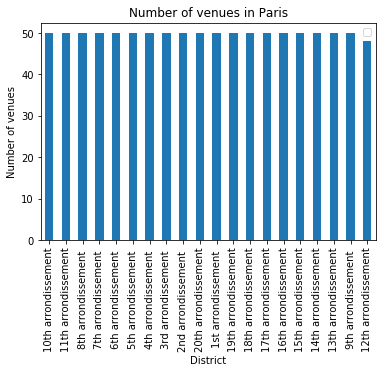

In [24]:
venue_dict.sort_values(by='Venue', ascending=False).plot.bar()
plt.xlabel('District')
plt.ylabel('Number of venues')
plt.legend('')
plt.title('Number of venues in Paris')
plt.show()

In [25]:
venue_category = Paris_venues.groupby('Venue Category').count()[['Venue']]
venue_category

,Venue
Venue Category,
Art Gallery,101
Art Museum,179
Circus,9
Comedy Club,46
Concert Hall,57
Dance Studio,11
Exhibit,34
History Museum,32
Indie Movie Theater,65


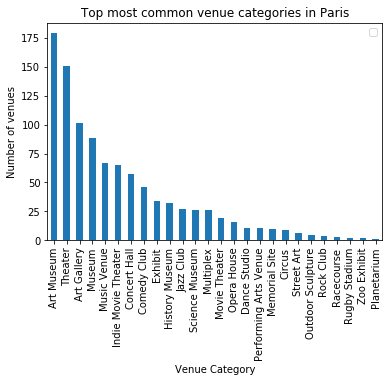

In [26]:
venue_category.sort_values(by='Venue', ascending=False).plot.bar()
plt.xlabel('Venue Category')
plt.ylabel('Number of venues')
plt.legend('')
plt.title('Top most common venue categories in Paris')
plt.show()

In [27]:
venue_category.shape

(26, 1)

In [28]:
Paris_venues['Venue Category'].unique()

array(['Art Museum', 'Theater', 'Exhibit', 'Art Gallery', 'Museum',
       'Concert Hall', 'Opera House', 'Indie Movie Theater', 'Jazz Club',
       'Movie Theater', 'History Museum', 'Comedy Club', 'Music Venue',
       'Memorial Site', 'Circus', 'Dance Studio', 'Science Museum',
       'Multiplex', 'Performing Arts Venue', 'Outdoor Sculpture',
       'Street Art', 'Rock Club', 'Zoo Exhibit', 'Racecourse',
       'Planetarium', 'Rugby Stadium'], dtype=object)

In [29]:
# one hot encoding
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix='', prefix_sep='')

# add neighborhood column back to dataframe
Paris_onehot['District'] = Paris_venues[['District']]

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]

Paris_onehot.head()

,District,Art Gallery,Art Museum,Circus,Comedy Club,Concert Hall,Dance Studio,Exhibit,History Museum,Indie Movie Theater,Jazz Club,Memorial Site,Movie Theater,Multiplex,Museum,Music Venue,Opera House,Outdoor Sculpture,Performing Arts Venue,Planetarium,Racecourse,Rock Club,Rugby Stadium,Science Museum,Street Art,Theater,Zoo Exhibit
0,1st arrondissement,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1st arrondissement,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st arrondissement,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st arrondissement,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Paris_onehot.shape

(998, 27)

In [31]:
Paris_grouped = Paris_onehot.groupby('District').mean().reset_index()
Paris_grouped

,District,Art Gallery,Art Museum,Circus,Comedy Club,Concert Hall,Dance Studio,Exhibit,History Museum,Indie Movie Theater,Jazz Club,Memorial Site,Movie Theater,Multiplex,Museum,Music Venue,Opera House,Outdoor Sculpture,Performing Arts Venue,Planetarium,Racecourse,Rock Club,Rugby Stadium,Science Museum,Street Art,Theater,Zoo Exhibit
0,10th arrondissement,0.1200,0.10,0.02,0.040000,0.080000,0.000000,0.02,0.020000,0.1000,0.04,0.000000,0.000000,0.040000,0.0600,0.060000,0.02,0.00,0.020000,0.00,0.000000,0.00,0.00,0.00,0.02,0.2400,0.000000
1,11th arrondissement,0.1200,0.10,0.02,0.060000,0.060000,0.020000,0.02,0.020000,0.0800,0.04,0.020000,0.000000,0.020000,0.1200,0.100000,0.02,0.00,0.000000,0.00,0.000000,0.02,0.00,0.04,0.00,0.1200,0.000000
2,12th arrondissement,0.0625,0.00,0.00,0.020833,0.083333,0.083333,0.00,0.020833,0.0625,0.00,0.041667,0.104167,0.041667,0.0625,0.145833,0.00,0.00,0.041667,0.00,0.020833,0.00,0.00,0.00,0.00,0.1875,0.020833
3,13th arrondissement,0.2000,0.14,0.00,0.020000,0.000000,0.020000,0.02,0.020000,0.0600,0.04,0.020000,0.000000,0.040000,0.1600,0.060000,0.02,0.00,0.000000,0.02,0.000000,0.00,0.00,0.06,0.00,0.0800,0.020000
4,14th arrondissement,0.0800,0.28,0.00,0.040000,0.000000,0.000000,0.06,0.040000,0.1000,0.06,0.000000,0.000000,0.040000,0.1000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.06,0.00,0.1400,0.000000
5,15th arrondissement,0.0800,0.32,0.00,0.060000,0.040000,0.000000,0.06,0.020000,0.0200,0.02,0.000000,0.020000,0.020000,0.0800,0.040000,0.00,0.02,0.020000,0.00,0.000000,0.00,0.02,0.02,0.00,0.1400,0.000000
6,16th arrondissement,0.0800,0.24,0.02,0.020000,0.040000,0.000000,0.00,0.040000,0.0200,0.00,0.000000,0.060000,0.060000,0.1000,0.060000,0.00,0.04,0.020000,0.00,0.040000,0.00,0.02,0.02,0.00,0.1200,0.000000
7,17th arrondissement,0.0600,0.18,0.00,0.060000,0.080000,0.000000,0.00,0.040000,0.0400,0.00,0.000000,0.020000,0.020000,0.0600,0.140000,0.02,0.00,0.020000,0.00,0.000000,0.00,0.00,0.02,0.02,0.2200,0.000000
8,18th arrondissement,0.0000,0.08,0.00,0.080000,0.100000,0.000000,0.00,0.040000,0.0800,0.04,0.000000,0.020000,0.060000,0.0200,0.120000,0.02,0.02,0.020000,0.00,0.000000,0.02,0.00,0.02,0.02,0.2400,0.000000
9,19th arrondissement,0.0800,0.08,0.04,0.040000,0.140000,0.020000,0.00,0.020000,0.0600,0.04,0.000000,0.020000,0.080000,0.0400,0.120000,0.00,0.00,0.020000,0.00,0.000000,0.02,0.00,0.02,0.02,0.1400,0.000000


In [32]:
Paris_grouped.shape

(20, 27)

In [33]:
# Print top 6 most common venues of each district
num_top_venues = 6

for dist in Paris_grouped['District']:
    print('----'+dist+'----')
    # get a dataframe of venues according to neigborhood and transpose it 
    temp = Paris_grouped[Paris_grouped['District'] == dist].T.reset_index()
    
    # update meaningful column names
    temp.columns = ['Venue Category', 'Frequency']
    
    # remove the first row of the dataframe (the previous 'District' column)
    temp = temp.iloc[1:]
    
    # convert 'freq' column to type float
    temp['Frequency'] = temp['Frequency'].astype(float)
    
    # round the 'freq' column to 2 digit
    temp = temp.round({'Frequency': 2})
    
    # sort the dataframe desceningly
    temp.sort_values(by='Frequency', ascending=False, inplace=True)
    
    # reset and drop index
    temp = temp.reset_index(drop=True)
    
    print(temp[:6])
    print('')

----10th arrondissement----
        Venue Category  Frequency
0              Theater       0.24
1          Art Gallery       0.12
2  Indie Movie Theater       0.10
3           Art Museum       0.10
4         Concert Hall       0.08
5          Music Venue       0.06

----11th arrondissement----
        Venue Category  Frequency
0          Art Gallery       0.12
1              Theater       0.12
2               Museum       0.12
3          Music Venue       0.10
4           Art Museum       0.10
5  Indie Movie Theater       0.08

----12th arrondissement----
  Venue Category  Frequency
0        Theater       0.19
1    Music Venue       0.15
2  Movie Theater       0.10
3   Concert Hall       0.08
4   Dance Studio       0.08
5    Art Gallery       0.06

----13th arrondissement----
   Venue Category  Frequency
0     Art Gallery       0.20
1          Museum       0.16
2      Art Museum       0.14
3         Theater       0.08
4     Music Venue       0.06
5  Science Museum       0.06

----14th 

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = Paris_grouped['District']

for ind in np.arange(Paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10th arrondissement,Theater,Art Gallery,Art Museum,Indie Movie Theater,Concert Hall,Music Venue,Museum,Comedy Club,Jazz Club,Multiplex
1,11th arrondissement,Art Gallery,Museum,Theater,Art Museum,Music Venue,Indie Movie Theater,Comedy Club,Concert Hall,Science Museum,Jazz Club
2,12th arrondissement,Theater,Music Venue,Movie Theater,Concert Hall,Dance Studio,Art Gallery,Indie Movie Theater,Museum,Memorial Site,Multiplex
3,13th arrondissement,Art Gallery,Museum,Art Museum,Theater,Music Venue,Science Museum,Indie Movie Theater,Jazz Club,Multiplex,Zoo Exhibit
4,14th arrondissement,Art Museum,Theater,Museum,Indie Movie Theater,Art Gallery,Science Museum,Exhibit,Jazz Club,Comedy Club,History Museum
5,15th arrondissement,Art Museum,Theater,Art Gallery,Museum,Comedy Club,Exhibit,Concert Hall,Music Venue,History Museum,Indie Movie Theater
6,16th arrondissement,Art Museum,Theater,Museum,Art Gallery,Music Venue,Movie Theater,Multiplex,Outdoor Sculpture,Racecourse,History Museum
7,17th arrondissement,Theater,Art Museum,Music Venue,Concert Hall,Art Gallery,Comedy Club,Museum,History Museum,Indie Movie Theater,Movie Theater
8,18th arrondissement,Theater,Music Venue,Concert Hall,Indie Movie Theater,Art Museum,Comedy Club,Multiplex,Jazz Club,History Museum,Opera House
9,19th arrondissement,Concert Hall,Theater,Music Venue,Multiplex,Art Museum,Art Gallery,Indie Movie Theater,Jazz Club,Circus,Museum


# Modelling

In [36]:
# set number of clusters
kclusters = 5

Paris_grouped_clustering = Paris_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 4, 2, 1, 3, 3, 0, 0, 0], dtype=int32)

In [0]:
# add clustering labels
try:  
  neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
  neighborhoods_venues_sorted = neighborhoods_venues_sorted
Paris_merged = df

# merge Paris_grouped with Paris_data to add latitude/longitude for each neighborhood
Paris_merged = Paris_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District')


In [38]:
Paris_merged.dropna(inplace=True)
Paris_merged

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st arrondissement,48.862158,2.337036,1,Art Museum,Theater,Art Gallery,Museum,Indie Movie Theater,Exhibit,Jazz Club,Concert Hall,History Museum,Comedy Club
1,2nd arrondissement,48.867684,2.343126,1,Art Museum,Theater,Art Gallery,Indie Movie Theater,Museum,Concert Hall,Exhibit,Jazz Club,Music Venue,Comedy Club
2,3rd arrondissement,48.862683,2.358685,1,Theater,Art Museum,Art Gallery,Museum,Indie Movie Theater,Concert Hall,Opera House,Exhibit,Comedy Club,Jazz Club
3,4th arrondissement,48.854156,2.356789,1,Art Museum,Art Gallery,Indie Movie Theater,Museum,Theater,Exhibit,Science Museum,Concert Hall,Comedy Club,History Museum
4,5th arrondissement,48.845419,2.352582,1,Art Museum,Museum,Art Gallery,Science Museum,Exhibit,Indie Movie Theater,Music Venue,Theater,Comedy Club,Jazz Club
5,6th arrondissement,48.849392,2.332260,1,Art Museum,Art Gallery,Indie Movie Theater,Museum,Theater,Science Museum,Comedy Club,Exhibit,Concert Hall,History Museum
6,7th arrondissement,48.854914,2.312860,3,Art Museum,Theater,Art Gallery,Museum,Comedy Club,Exhibit,Concert Hall,History Museum,Music Venue,Indie Movie Theater
7,8th arrondissement,48.877480,2.317650,3,Art Museum,Theater,Comedy Club,Music Venue,Art Gallery,Concert Hall,History Museum,Indie Movie Theater,Museum,Movie Theater
8,9th arrondissement,48.877070,2.337921,3,Art Museum,Theater,Comedy Club,Music Venue,Museum,Indie Movie Theater,Concert Hall,Exhibit,History Museum,Art Gallery
9,10th arrondissement,48.876008,2.360445,0,Theater,Art Gallery,Art Museum,Indie Movie Theater,Concert Hall,Music Venue,Museum,Comedy Club,Jazz Club,Multiplex


In [39]:
# create map
map_clusters = folium.Map(location=[Paris_lat, Paris_lng], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Latitude'], Paris_merged['Longitude'], Paris_merged['District'], Paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster -1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
# Cluster 0
Paris_merged.loc[Paris_merged['Cluster Labels'] == 0, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,10th arrondissement,Theater,Art Gallery,Art Museum,Indie Movie Theater,Concert Hall,Music Venue,Museum,Comedy Club,Jazz Club,Multiplex
16,17th arrondissement,Theater,Art Museum,Music Venue,Concert Hall,Art Gallery,Comedy Club,Museum,History Museum,Indie Movie Theater,Movie Theater
17,18th arrondissement,Theater,Music Venue,Concert Hall,Indie Movie Theater,Art Museum,Comedy Club,Multiplex,Jazz Club,History Museum,Opera House
18,19th arrondissement,Concert Hall,Theater,Music Venue,Multiplex,Art Museum,Art Gallery,Indie Movie Theater,Jazz Club,Circus,Museum


In [41]:
# Cluster 1
Paris_merged.loc[Paris_merged['Cluster Labels'] == 1, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st arrondissement,Art Museum,Theater,Art Gallery,Museum,Indie Movie Theater,Exhibit,Jazz Club,Concert Hall,History Museum,Comedy Club
1,2nd arrondissement,Art Museum,Theater,Art Gallery,Indie Movie Theater,Museum,Concert Hall,Exhibit,Jazz Club,Music Venue,Comedy Club
2,3rd arrondissement,Theater,Art Museum,Art Gallery,Museum,Indie Movie Theater,Concert Hall,Opera House,Exhibit,Comedy Club,Jazz Club
3,4th arrondissement,Art Museum,Art Gallery,Indie Movie Theater,Museum,Theater,Exhibit,Science Museum,Concert Hall,Comedy Club,History Museum
4,5th arrondissement,Art Museum,Museum,Art Gallery,Science Museum,Exhibit,Indie Movie Theater,Music Venue,Theater,Comedy Club,Jazz Club
5,6th arrondissement,Art Museum,Art Gallery,Indie Movie Theater,Museum,Theater,Science Museum,Comedy Club,Exhibit,Concert Hall,History Museum
13,14th arrondissement,Art Museum,Theater,Museum,Indie Movie Theater,Art Gallery,Science Museum,Exhibit,Jazz Club,Comedy Club,History Museum


In [42]:
# Cluster 2
Paris_merged.loc[Paris_merged['Cluster Labels'] == 2, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,11th arrondissement,Art Gallery,Museum,Theater,Art Museum,Music Venue,Indie Movie Theater,Comedy Club,Concert Hall,Science Museum,Jazz Club
12,13th arrondissement,Art Gallery,Museum,Art Museum,Theater,Music Venue,Science Museum,Indie Movie Theater,Jazz Club,Multiplex,Zoo Exhibit
19,20th arrondissement,Art Gallery,Music Venue,Concert Hall,Theater,Museum,Art Museum,Multiplex,Circus,Comedy Club,Dance Studio


In [43]:
# Cluster 3
Paris_merged.loc[Paris_merged['Cluster Labels'] == 3, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,7th arrondissement,Art Museum,Theater,Art Gallery,Museum,Comedy Club,Exhibit,Concert Hall,History Museum,Music Venue,Indie Movie Theater
7,8th arrondissement,Art Museum,Theater,Comedy Club,Music Venue,Art Gallery,Concert Hall,History Museum,Indie Movie Theater,Museum,Movie Theater
8,9th arrondissement,Art Museum,Theater,Comedy Club,Music Venue,Museum,Indie Movie Theater,Concert Hall,Exhibit,History Museum,Art Gallery
14,15th arrondissement,Art Museum,Theater,Art Gallery,Museum,Comedy Club,Exhibit,Concert Hall,Music Venue,History Museum,Indie Movie Theater
15,16th arrondissement,Art Museum,Theater,Museum,Art Gallery,Music Venue,Movie Theater,Multiplex,Outdoor Sculpture,Racecourse,History Museum


In [44]:
# Cluster 4
Paris_merged.loc[Paris_merged['Cluster Labels'] == 4, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,12th arrondissement,Theater,Music Venue,Movie Theater,Concert Hall,Dance Studio,Art Gallery,Indie Movie Theater,Museum,Memorial Site,Multiplex


In [45]:
# Cluster 5
Paris_merged.loc[Paris_merged['Cluster Labels'] == 5, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
